In [ ]:
import os
import pandas as pd


match_folder = "matches"
player_name = "Emre Can"


emre_can_matches = []


for filename in os.listdir(match_folder):
    if filename.endswith(".csv"):
        filepath = os.path.join(match_folder, filename)
        df = pd.read_csv(filepath)

        
        if (df['player'] == player_name).any():
            emre_can_matches.append({
                'filename': filename,
                'filepath': filepath,
                'match_id': filename.split("_")[0]  
            })


print(f"Emre Can appeared in {len(emre_can_matches)} matches.")


✅ Emre Can appeared in 31 matches.


In [ ]:
import numpy as np


emre_stats = []

for match in emre_can_matches:
    df = pd.read_csv(match['filepath'])
    df_player = df[df['player'] == player_name]

    match_date = df['match_date'].iloc[0] if 'match_date' in df.columns else match['filename'][:10]

    # MINUTES PLAYED 
    minutes_played = 90
    sub_in_row = df[(df['type'] == 'Substitution') & (df['substitution_replacement'] == player_name)]
    if not sub_in_row.empty:
        minute_subbed_in = sub_in_row['minute'].min()
        minutes_played = max(0, 90 - minute_subbed_in)

    #  PASSING 
    df_pass = df_player[df_player['type'] == 'Pass']
    total_passes = len(df_pass)
    completed_passes = df_pass['pass_outcome'].isna().sum()
    pass_completion = completed_passes / total_passes if total_passes > 0 else np.nan
    avg_pass_length = df_pass['pass_length'].mean() if 'pass_length' in df_pass.columns else np.nan
    crosses = df_pass['pass_cross'].sum() if 'pass_cross' in df_pass.columns else 0
    shot_assists = df_pass['pass_shot_assist'].sum() if 'pass_shot_assist' in df_pass.columns else 0
    goal_assists = df_pass['pass_goal_assist'].sum() if 'pass_goal_assist' in df_pass.columns else 0
    passes_under_pressure = df_pass['under_pressure'].sum() if 'under_pressure' in df_pass.columns else 0

    #  BALL RECEIPT 
    df_receipt = df_player[df_player['type'] == 'Ball Receipt*']
    successful_receipts = df_receipt['ball_receipt_outcome'].isna().sum()

    #  CARRY 
    df_carry = df_player[df_player['type'] == 'Carry']
    carry_distances = []
    for _, row in df_carry.iterrows():
        try:
            start = eval(row['location']) if isinstance(row['location'], str) else row['location']
            end = eval(row['carry_end_location']) if isinstance(row['carry_end_location'], str) else row['carry_end_location']
            if isinstance(start, list) and isinstance(end, list) and len(start) == 2 and len(end) == 2:
                carry_distances.append(np.linalg.norm(np.array(end) - np.array(start)))
        except:
            continue
    avg_carry_distance = np.mean(carry_distances) if carry_distances else np.nan
    carries_under_pressure = df_carry['under_pressure'].sum() if 'under_pressure' in df_carry.columns else 0

    #  DRIBBLE 
    df_dribble = df_player[df_player['type'] == 'Dribble']
    total_dribbles = len(df_dribble)
    successful_dribbles = (df_dribble['dribble_outcome'] == 'Complete').sum()
    dribble_success_rate = successful_dribbles / total_dribbles if total_dribbles > 0 else np.nan

    #  DUELS 
    df_duel = df_player[df_player['type'] == 'Duel']
    total_duels = len(df_duel)
    duels_won = df_duel['duel_outcome'].isin(['Success In Play', 'Success Out']).sum()
    duel_success_rate = duels_won / total_duels if total_duels > 0 else np.nan

    #  DEFENSE 
    recoveries = len(df_player[df_player['type'] == 'Ball Recovery'])
    interceptions = len(df_player[df_player['type'] == 'Interception'])
    pressures = len(df_player[df_player['type'] == 'Pressure'])

    #  Normalize per 90 minutes 
    mins = minutes_played if minutes_played > 0 else 1
    factor = 90 / mins

    emre_stats.append({
        'match_id': match['match_id'],
        'match_date': match_date,
        'minutes_played': minutes_played,
        'total_passes': total_passes,
        'passes_per_90': total_passes * factor,
        'pass_completion_rate': pass_completion,
        'avg_pass_length': avg_pass_length,
        'crosses_per_90': crosses * factor,
        'shot_assists_per_90': shot_assists * factor,
        'goal_assists_per_90': goal_assists * factor,
        'passes_under_pressure_per_90': passes_under_pressure * factor,
        'successful_receipts_per_90': successful_receipts * factor,
        'avg_carry_distance': avg_carry_distance,
        'carries_under_pressure_per_90': carries_under_pressure * factor,
        'total_dribbles': total_dribbles,
        'dribbles_per_90': total_dribbles * factor,
        'dribble_success_rate': dribble_success_rate,
        'total_duels': total_duels,
        'duels_per_90': total_duels * factor,
        'duel_success_rate': duel_success_rate,
        'recoveries_per_90': recoveries * factor,
        'interceptions_per_90': interceptions * factor,
        'pressures_per_90': pressures * factor,
    })

df_emre = pd.DataFrame(emre_stats).sort_values(by='match_date').reset_index(drop=True)

print("✅ Per-match stats (normalized) for Emre Can:")
print(df_emre.head())


✅ Per-match stats (normalized) for Emre Can:
  match_id  match_date  minutes_played  total_passes  passes_per_90  \
0    18245  18245_Real               8             3      33.750000   
1  3753984  3753984_Li              90            29      29.000000   
2  3753985  3753985_St              29            22      68.275862   
3  3753991  3753991_Li              90            63      63.000000   
4  3754003  3754003_Ma              90            55      55.000000   

   pass_completion_rate  avg_pass_length  crosses_per_90  shot_assists_per_90  \
0              1.000000        15.839613             0.0                  0.0   
1              0.758621        23.382885             1.0                  0.0   
2              0.909091        17.614985             0.0                  0.0   
3              0.809524        18.853412             0.0                  1.0   
4              0.800000        21.049622             1.0                  0.0   

   goal_assists_per_90  ...  carries_unde

In [ ]:

output_path = "emre_can_match_stats.csv"
df_emre.to_csv(output_path, index=False)

print(f"✅ Saved Emre Can's per-match stats to '{output_path}'")


✅ Saved Emre Can's per-match stats to 'emre_can_match_stats.csv'


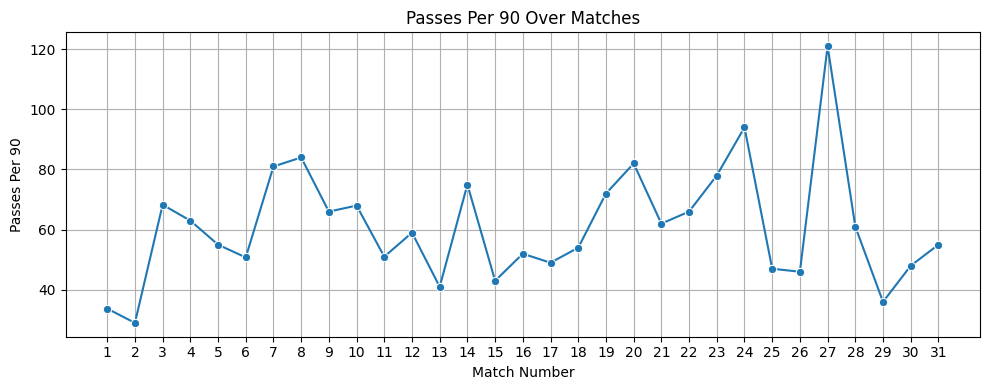

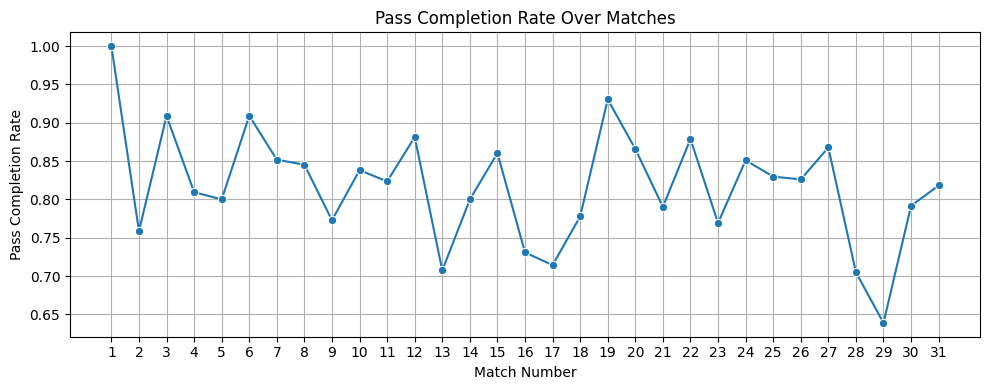

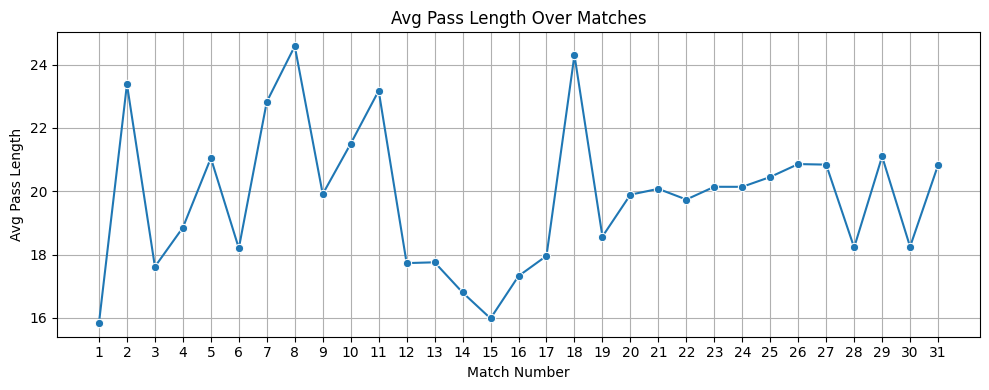

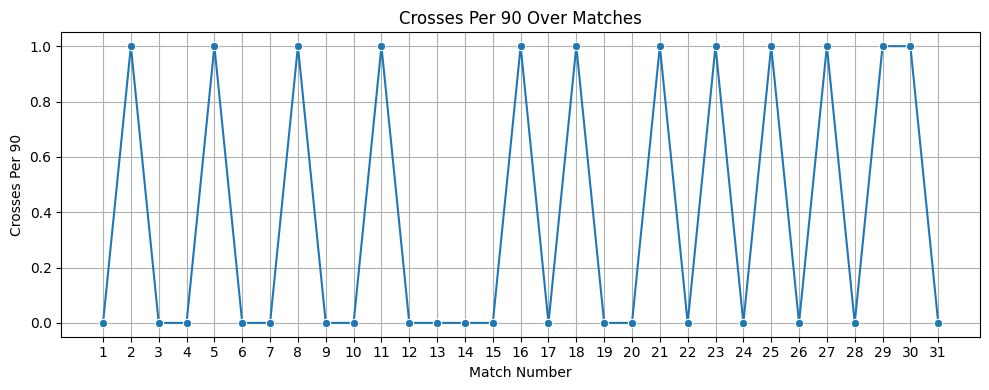

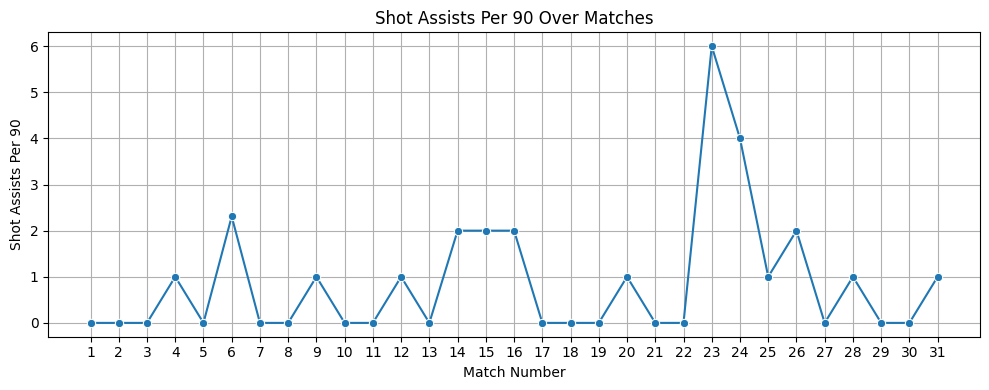

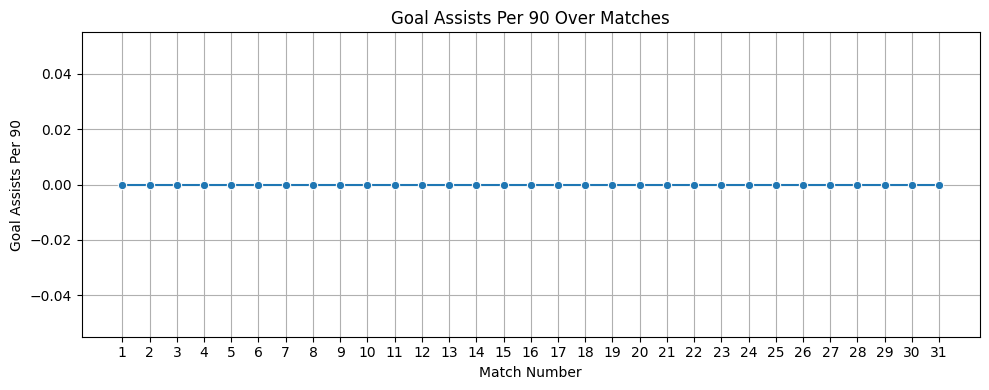

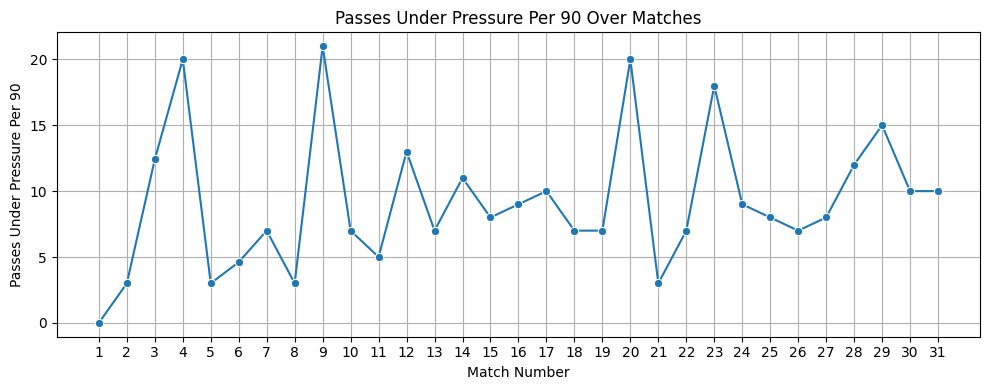

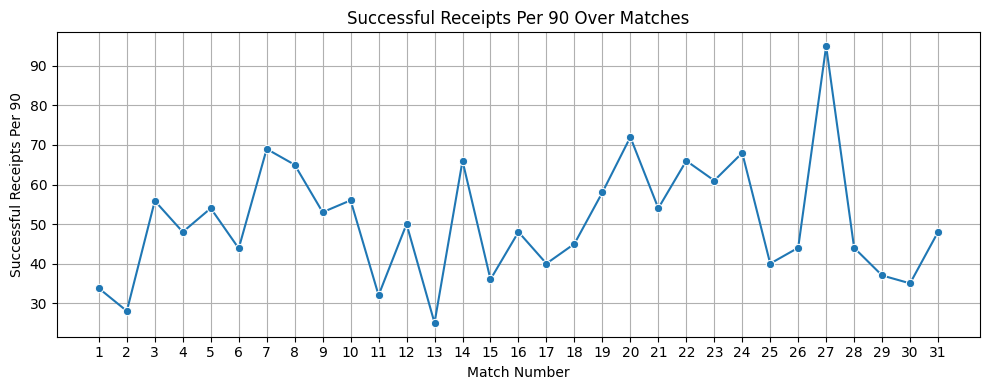

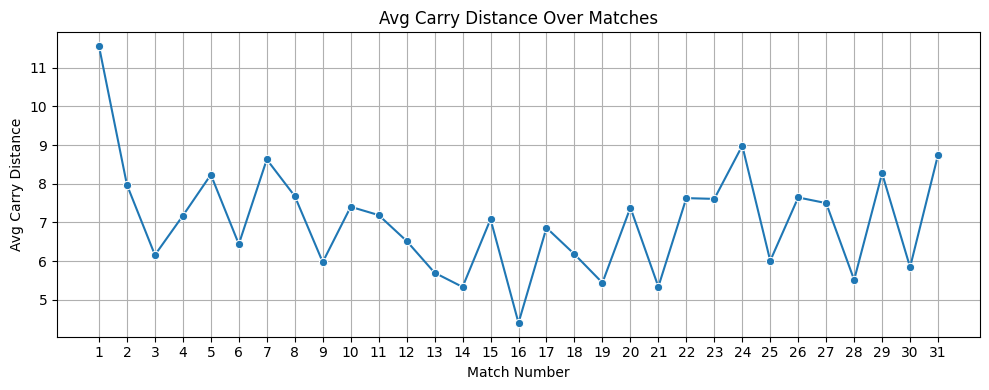

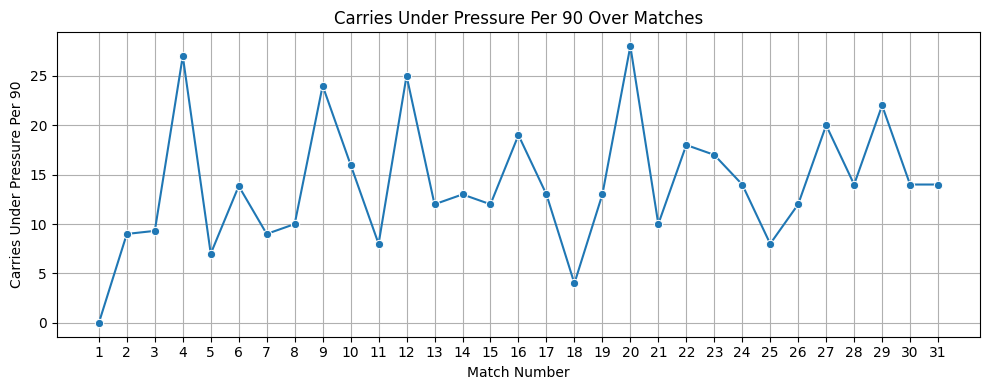

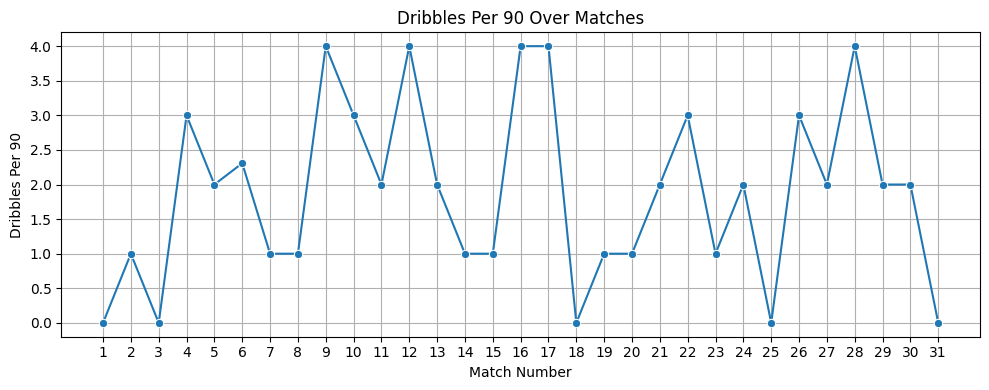

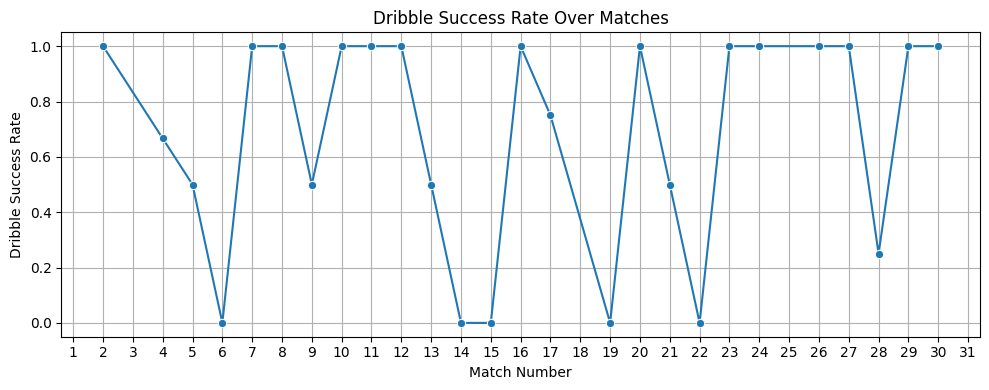

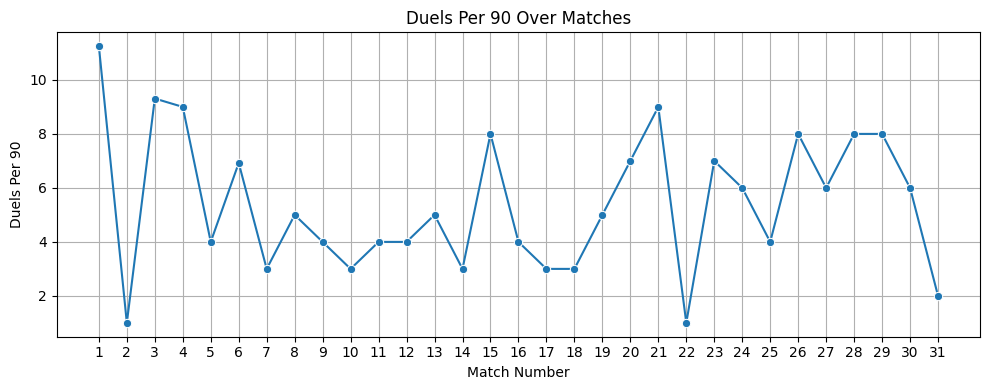

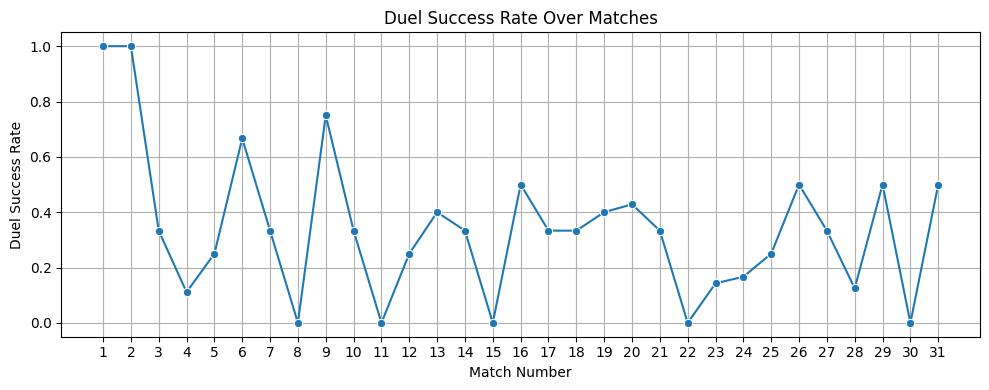

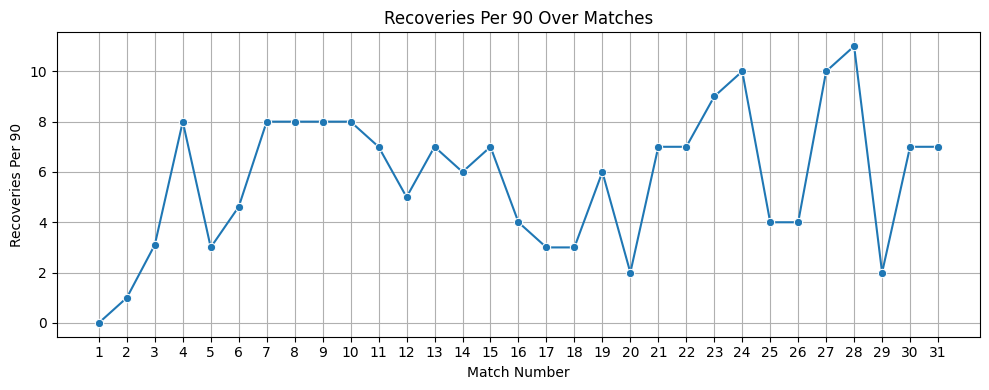

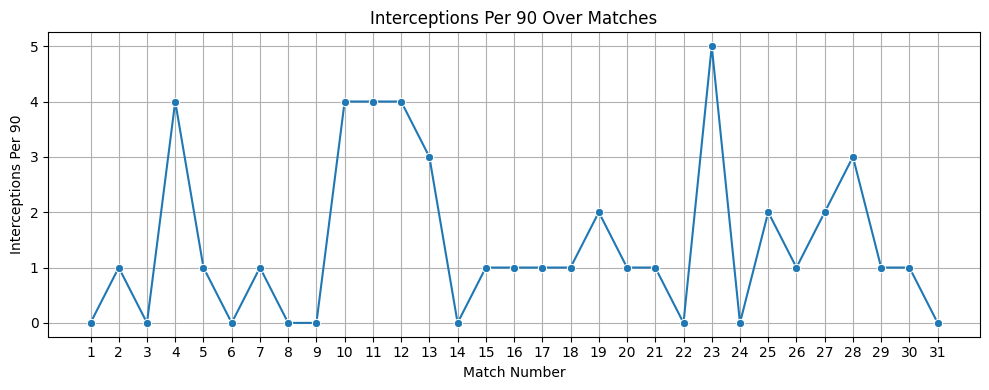

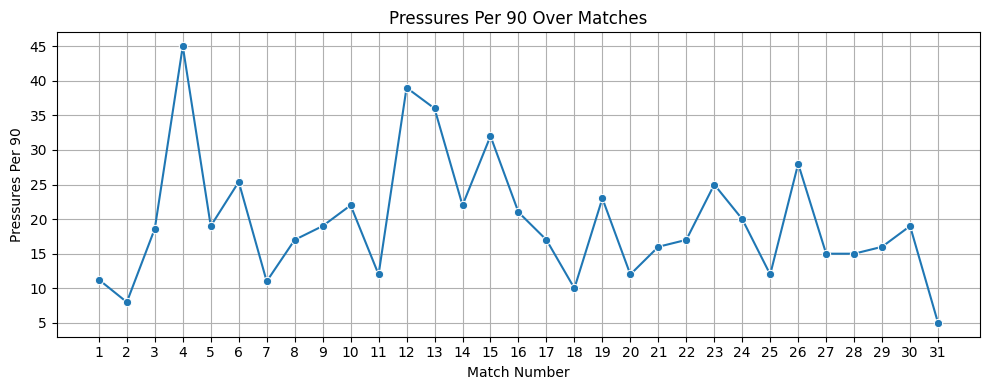

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_emre['match_num'] = range(1, len(df_emre) + 1)


metrics_to_plot = [
    'passes_per_90',
    'pass_completion_rate',
    'avg_pass_length',
    'crosses_per_90',
    'shot_assists_per_90',
    'goal_assists_per_90',
    'passes_under_pressure_per_90',
    'successful_receipts_per_90',
    'avg_carry_distance',
    'carries_under_pressure_per_90',
    'dribbles_per_90',
    'dribble_success_rate',
    'duels_per_90',
    'duel_success_rate',
    'recoveries_per_90',
    'interceptions_per_90',
    'pressures_per_90',
]


for metric in metrics_to_plot:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df_emre, x='match_num', y=metric, marker='o')
    plt.title(f"{metric.replace('_', ' ').title()} Over Matches")
    plt.xlabel("Match Number")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.grid(True)
    plt.xticks(df_emre['match_num'])  # Ensure all matches are labeled
    plt.tight_layout()
    plt.show()


In [18]:
# !pip install scikit-learn


In [ ]:
from sklearn.ensemble import IsolationForest
import numpy as np


features = [
    'passes_per_90',
    'pass_completion_rate',
    'avg_pass_length',
    'crosses_per_90',
    'shot_assists_per_90',
    'goal_assists_per_90',
    'passes_under_pressure_per_90',
    'successful_receipts_per_90',
    'avg_carry_distance',
    'carries_under_pressure_per_90',
    'dribbles_per_90',
    'dribble_success_rate',
    'duels_per_90',
    'duel_success_rate',
    'recoveries_per_90',
    'interceptions_per_90',
    'pressures_per_90',
]

df_anomaly = df_emre.dropna(subset=features).copy()

model = IsolationForest(n_estimators=100, contamination=0.15, random_state=42)
df_anomaly['anomaly'] = model.fit_predict(df_anomaly[features])

df_anomaly['anomaly_label'] = df_anomaly['anomaly'].map({-1: 'Anomaly', 1: 'Normal'})

df_emre = df_emre.merge(df_anomaly[['match_id', 'anomaly_label']], on='match_id', how='left')

print("Anomalous Matches:")
print(df_emre[df_emre['anomaly_label'] == 'Anomaly'][['match_num', 'match_id', 'anomaly_label']])


🚨 Anomalous Matches:
    match_num match_id anomaly_label
1           2  3753984       Anomaly
3           4  3753991       Anomaly
22         23  3754251       Anomaly
28         29  3754345       Anomaly


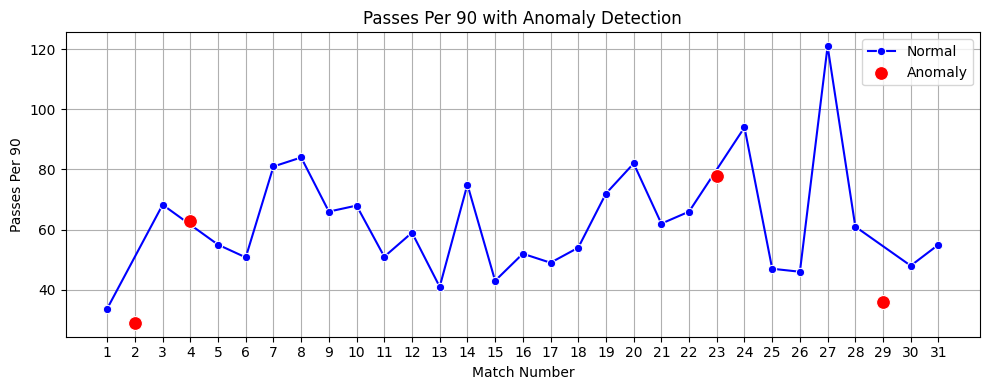

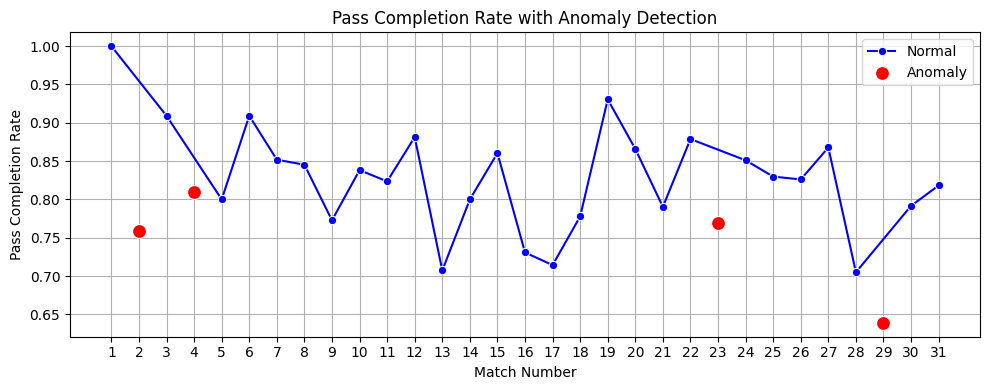

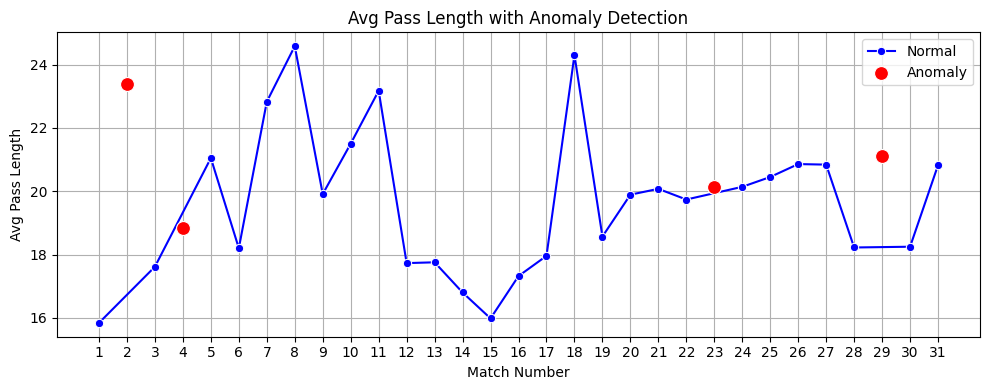

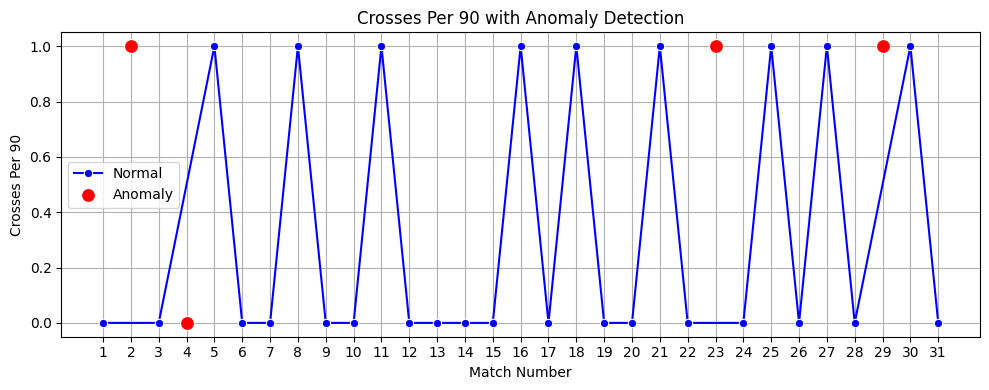

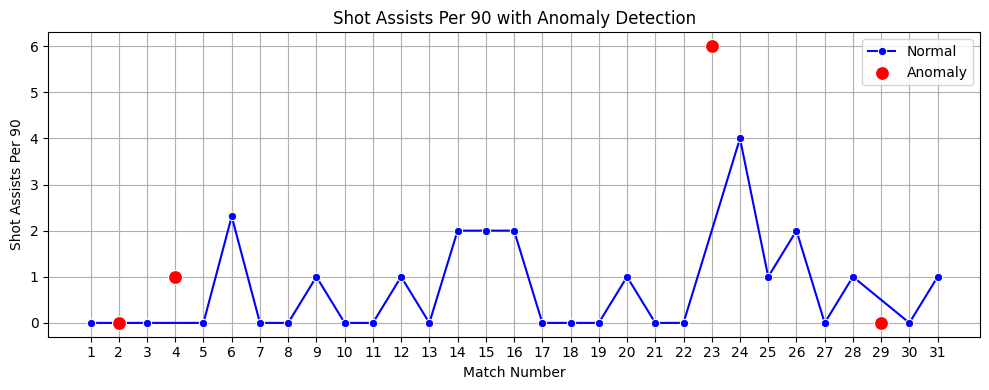

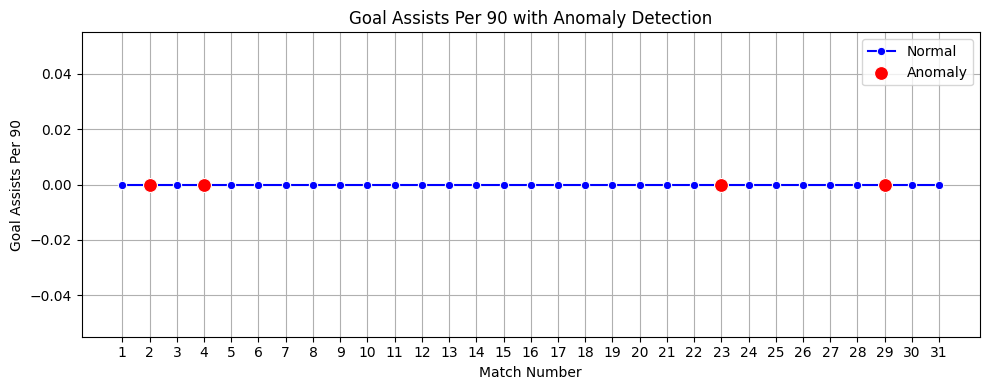

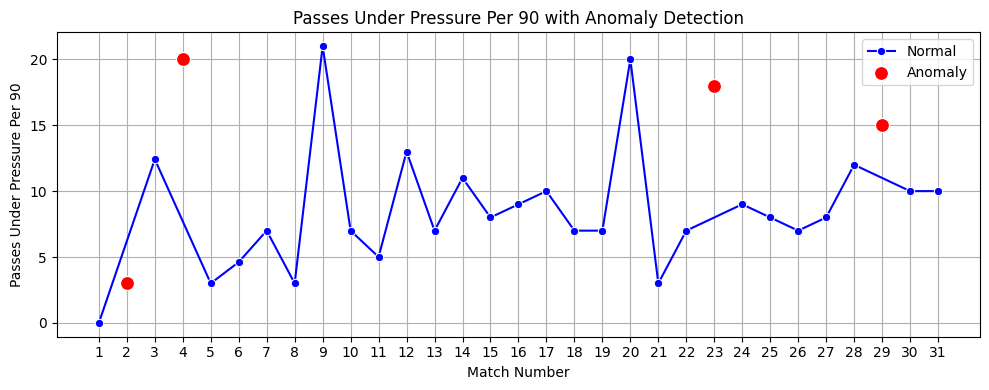

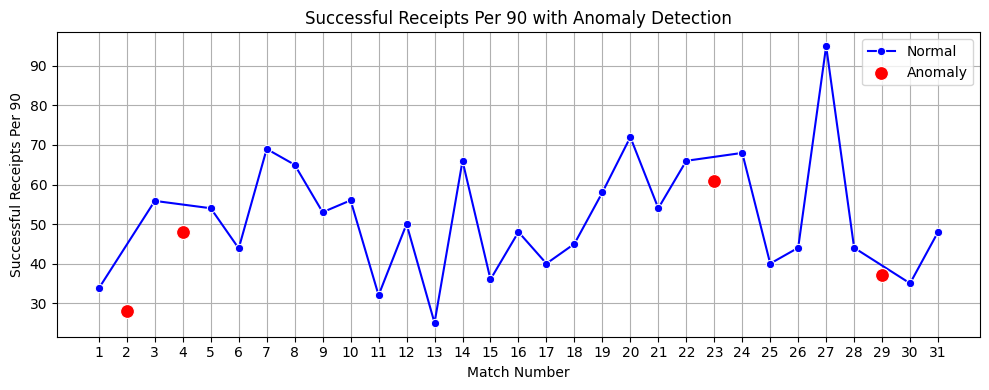

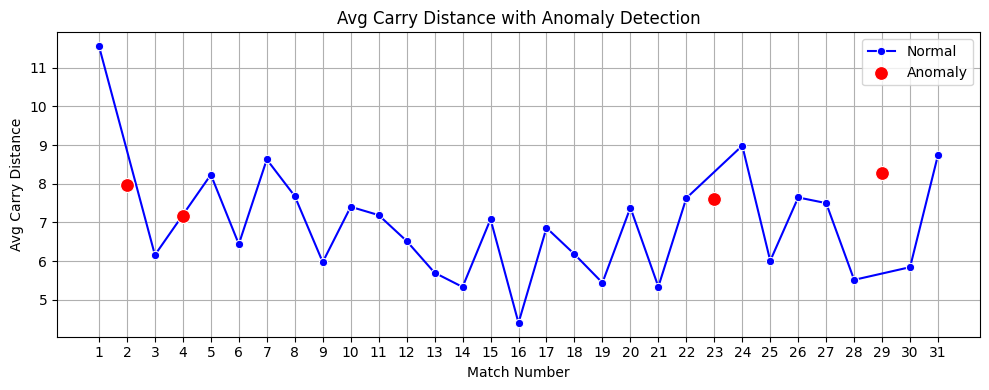

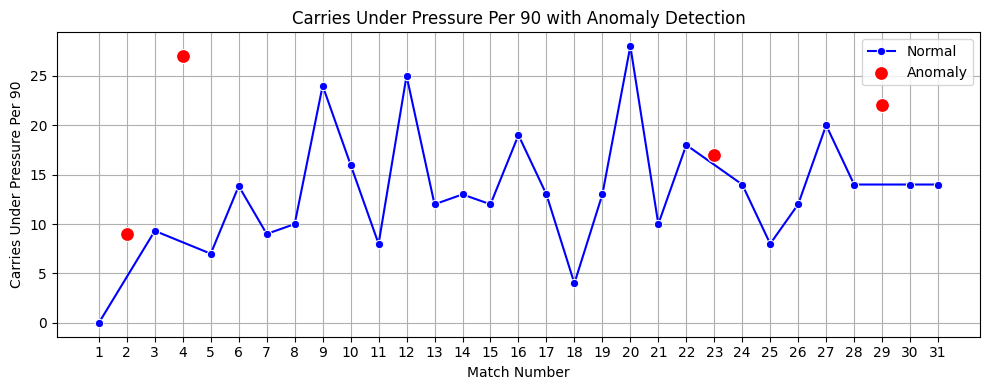

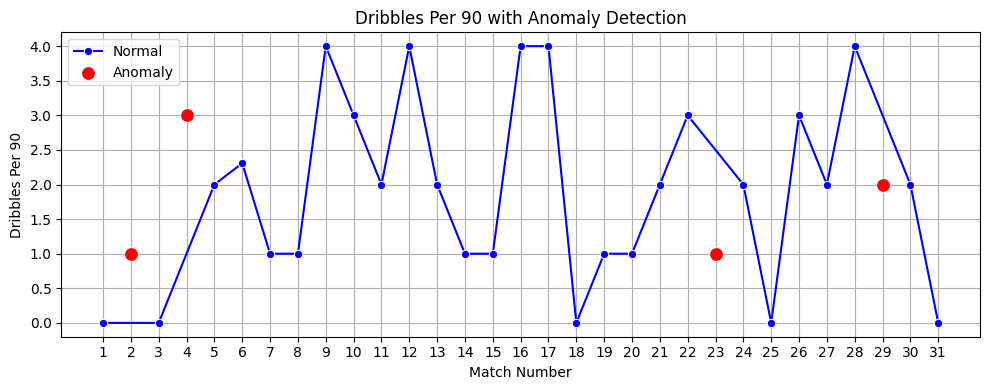

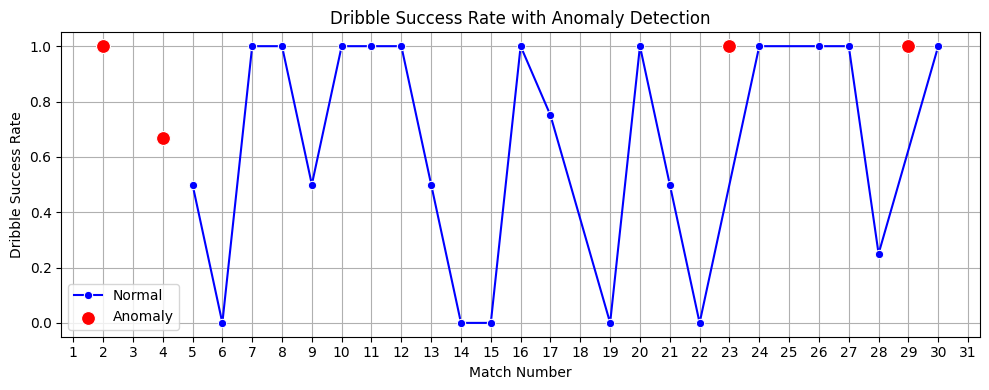

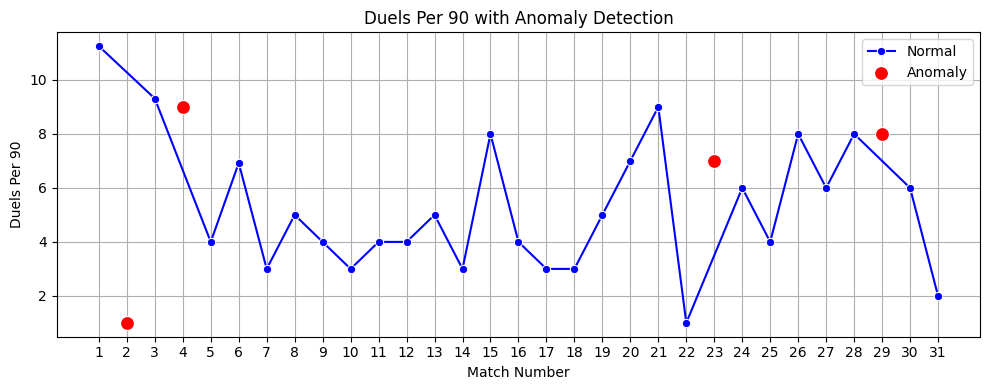

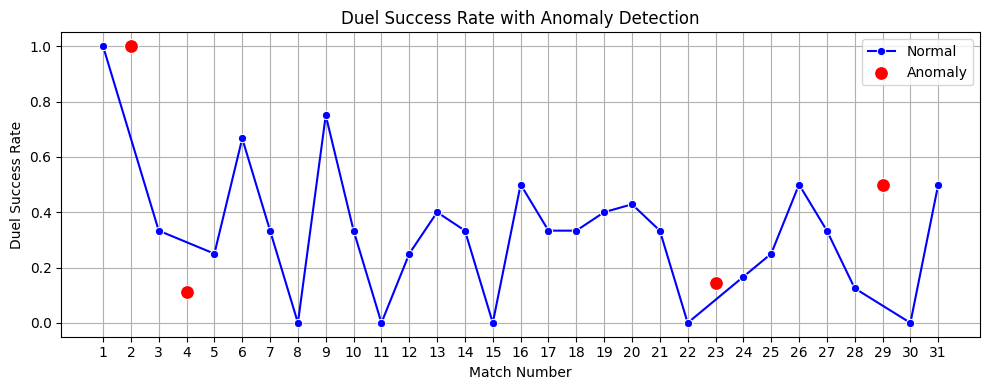

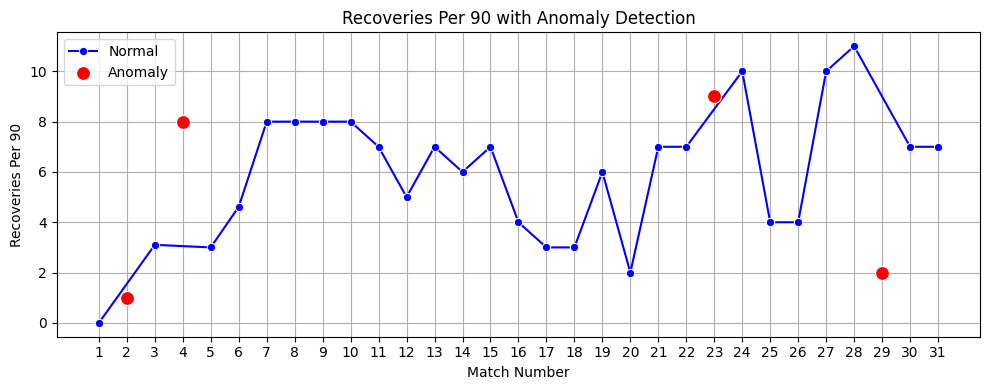

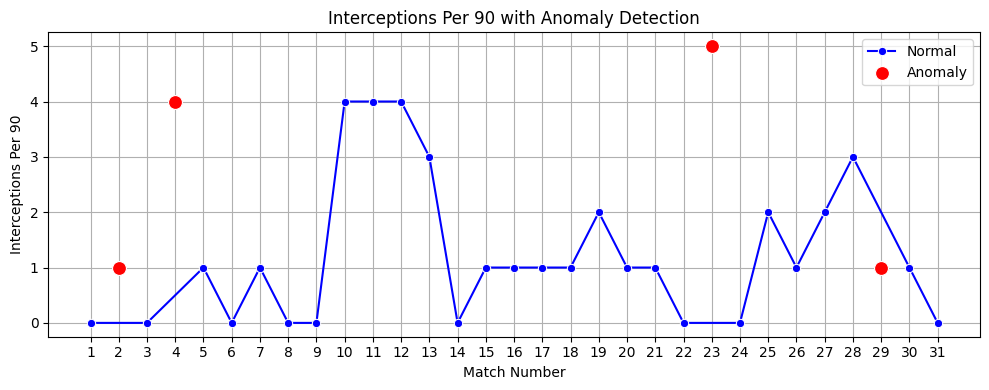

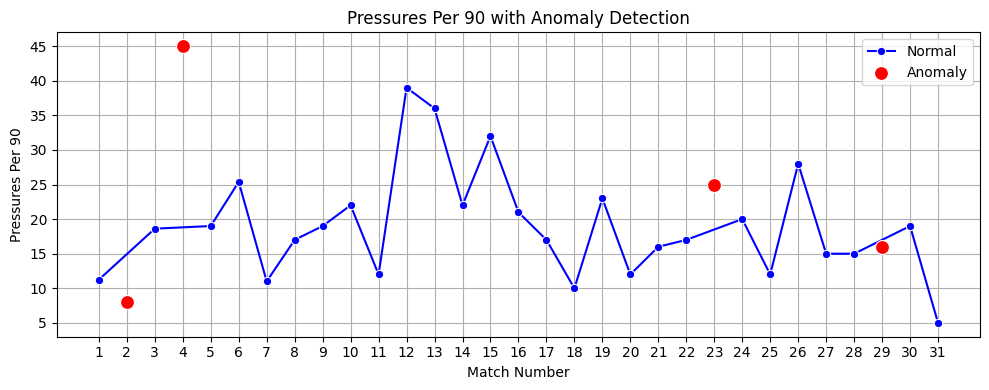

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_to_plot = [
    'passes_per_90',
    'pass_completion_rate',
    'avg_pass_length',
    'crosses_per_90',
    'shot_assists_per_90',
    'goal_assists_per_90',
    'passes_under_pressure_per_90',
    'successful_receipts_per_90',
    'avg_carry_distance',
    'carries_under_pressure_per_90',
    'dribbles_per_90',
    'dribble_success_rate',
    'duels_per_90',
    'duel_success_rate',
    'recoveries_per_90',
    'interceptions_per_90',
    'pressures_per_90',
]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 4))
    
    # Plot normal points
    sns.lineplot(
        data=df_emre[df_emre['anomaly_label'] != 'Anomaly'],
        x='match_num', y=metric, marker='o', label='Normal', color='blue'
    )
    
    # Overlay anomalies in red
    sns.scatterplot(
        data=df_emre[df_emre['anomaly_label'] == 'Anomaly'],
        x='match_num', y=metric, color='red', s=100, label='Anomaly', zorder=10
    )
    
    plt.title(f"{metric.replace('_', ' ').title()} with Anomaly Detection")
    plt.xlabel("Match Number")
    plt.ylabel(metric.replace('_', ' ').title())
    plt.grid(True)
    plt.xticks(df_emre['match_num'])
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
from scipy.stats import zscore
import numpy as np

features = [
    'passes_per_90',
    'pass_completion_rate',
    'avg_pass_length',
    'crosses_per_90',
    'shot_assists_per_90',
    'goal_assists_per_90',
    'passes_under_pressure_per_90',
    'successful_receipts_per_90',
    'avg_carry_distance',
    'carries_under_pressure_per_90',
    'dribbles_per_90',
    'dribble_success_rate',
    'duels_per_90',
    'duel_success_rate',
    'recoveries_per_90',
    'interceptions_per_90',
    'pressures_per_90',
]

df_clean = df_emre.dropna(subset=features).copy()


z_scores = df_clean[features].apply(zscore)
anomaly_rows = df_clean[df_clean['anomaly_label'] == 'Anomaly'].copy()
anomaly_reasons = []

for idx, row in anomaly_rows.iterrows():
    z_row = z_scores.loc[idx]
    unusual_metrics = []
    for metric in features:
        if abs(z_row[metric]) > 2.0:
            unusual_metrics.append(metric)
    
    anomaly_reasons.append({
        'match_num': row['match_num'],
        'match_id': row['match_id'],
        'minutes_played': row['minutes_played'],
        'unusual_metrics': ', '.join(unusual_metrics),
        'num_unusual_metrics': len(unusual_metrics)
    })


df_anomaly_summary = pd.DataFrame(anomaly_reasons).sort_values(by='num_unusual_metrics', ascending=False).reset_index(drop=True)

print("Emre Can – Anomalous Matches & Unusual Metrics:")
print(df_anomaly_summary.to_string(index=False))

🚨 Emre Can – Anomalous Matches & Unusual Metrics:
 match_num match_id  minutes_played                                 unusual_metrics  num_unusual_metrics
         2  3753984              90            duel_success_rate, recoveries_per_90                    2
         4  3753991              90 carries_under_pressure_per_90, pressures_per_90                    2
        23  3754251              90       shot_assists_per_90, interceptions_per_90                    2
        29  3754345              90                            pass_completion_rate                    1
